In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("../project/COVID-19.csv")
df.head(10)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
5,04/29/2020,03/25/2020,7457,4803,1395,429
6,04/29/2020,03/21/2020,4713,2663,757,231
7,04/29/2020,03/20/2020,7756,4121,889,237
8,04/29/2020,03/14/2020,1702,684,217,59
9,04/29/2020,04/24/2020,8683,2092,230,18


In [4]:
df.columns

Index(['extract_date', 'specimen_date', 'Number_tested', 'Number_confirmed',
       'Number_hospitalized', 'Number_deaths'],
      dtype='object')

In [5]:
df.dtypes

extract_date           object
specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
Number_deaths           int64
dtype: object

In [6]:
df=df.dropna()

In [7]:
print(f"Duplicate entries:{df.duplicated().sum()}")

Duplicate entries:0


In [8]:
df.count()

extract_date           176148
specimen_date          176148
Number_tested          176148
Number_confirmed       176148
Number_hospitalized    176148
Number_deaths          176148
dtype: int64

In [9]:
new_df=df.drop(['extract_date'],axis=1)
new_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/17/2020,9979,3386,527,96
1,02/08/2020,1,0,0,0
2,03/05/2020,63,5,3,1
3,04/09/2020,9019,4803,1253,386
4,04/03/2020,9389,5523,1688,582
5,03/25/2020,7457,4803,1395,429
6,03/21/2020,4713,2663,757,231
7,03/20/2020,7756,4121,889,237
8,03/14/2020,1702,684,217,59
9,04/24/2020,8683,2092,230,18


In [10]:
new_df['specimen_date']=pd.to_datetime(new_df['specimen_date'],infer_datetime_format=True,errors='coerce')

In [11]:
new_df.dtypes

specimen_date          datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object

In [12]:
new_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582
5,2020-03-25,7457,4803,1395,429
6,2020-03-21,4713,2663,757,231
7,2020-03-20,7756,4121,889,237
8,2020-03-14,1702,684,217,59
9,2020-04-24,8683,2092,230,18


In [13]:
covid_df= new_df.loc[new_df.specimen_date<'2022-01-01']
covid_df

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582
...,...,...,...,...,...
176143,2020-11-18,21551,2483,163,41
176144,2021-03-17,13961,1678,166,27
176145,2020-03-09,401,89,36,19
176146,2021-09-10,14573,503,38,0


In [14]:
covid_df.dtypes

specimen_date          datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object

In [15]:
output_file_path = "../project/covid_df.csv"
covid_df.to_csv(output_file_path, index=False)

In [16]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175979 entries, 0 to 176147
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   specimen_date        175979 non-null  datetime64[ns]
 1   Number_tested        175979 non-null  int64         
 2   Number_confirmed     175979 non-null  int64         
 3   Number_hospitalized  175979 non-null  int64         
 4   Number_deaths        175979 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.1 MB


In [17]:
#def datetime_to_int(dt):
#    return int(dt.strftime("%Y%m%d%H%M%S"))

In [19]:
covid_df

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582
...,...,...,...,...,...
176143,2020-11-18,21551,2483,163,41
176144,2021-03-17,13961,1678,166,27
176145,2020-03-09,401,89,36,19
176146,2021-09-10,14573,503,38,0


In [40]:
covid_df.specimen_date = covid_df.specimen_date.values.astype("datetime64[ns]").astype(np.int64)

In [20]:
covid_df.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,175979.000000,175979.000000,175979.000000,175979.000000
mean,11152.174379,1429.285006,235.172003,74.011695
std,6406.824861,1368.164107,392.127262,160.170459
min,1.000000,0.000000,0.000000,0.000000
25%,6739.000000,373.000000,39.000000,4.000000
50%,10889.000000,1137.000000,116.000000,21.000000
75%,16448.000000,1961.000000,199.000000,44.000000
max,24727.000000,6852.000000,2016.000000,923.000000


In [21]:
covid_df.dtypes

specimen_date          datetime64[ns]
Number_tested                   int64
Number_confirmed                int64
Number_hospitalized             int64
Number_deaths                   int64
dtype: object

In [22]:
for column in covid_df.columns:
    print(f"Column{column}has{covid_df[column].isnull().sum()}null values")

Columnspecimen_datehas0null values
ColumnNumber_testedhas0null values
ColumnNumber_confirmedhas0null values
ColumnNumber_hospitalizedhas0null values
ColumnNumber_deathshas0null values


In [23]:
output_file_path = "../project/covid_df.csv"
covid_df.to_csv(output_file_path, index=False)

In [24]:
covid_df.columns.to_list()

['specimen_date',
 'Number_tested',
 'Number_confirmed',
 'Number_hospitalized',
 'Number_deaths']

In [25]:
#covid_df.index = pd.DatetimeIndex(covid_df["specimen_date"], tz="utc")

In [26]:
#covid_df['specimen_date'] = pd.to_datetime(covid_df['specimen_date'])

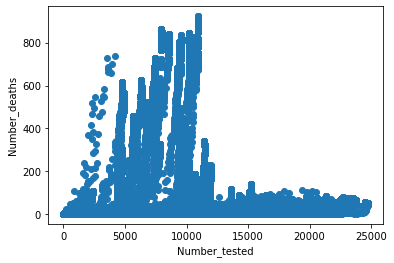

In [27]:
plt.scatter(covid_df.Number_tested, covid_df.Number_deaths)
plt.xlabel('Number_tested')
plt.ylabel('Number_deaths')
plt.show()

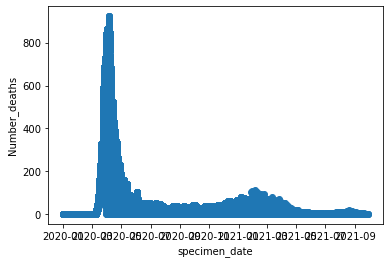

In [28]:
plt.scatter(covid_df.specimen_date, covid_df.Number_deaths)
plt.xlabel('specimen_date')
plt.ylabel('Number_deaths')
plt.show()

In [29]:
X = df.Number_hospitalized.values.reshape(-1, 1)

In [30]:
y = df.Number_deaths.values.reshape(-1, 1)

In [31]:
X.shape

(176148, 1)

In [32]:
y.shape

(176148, 1)

In [33]:
X[:5]

array([[ 527],
       [   0],
       [   3],
       [1253],
       [1688]], dtype=int64)

In [34]:
y[:5]

array([[ 96],
       [  0],
       [  1],
       [386],
       [582]], dtype=int64)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X, y)

LinearRegression()

In [37]:
y_pred = model.predict(X)
print(y_pred.shape)

(176148, 1)


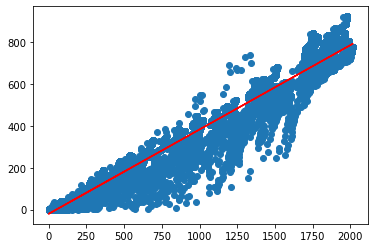

In [38]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [39]:
print(model.coef_)
print(model.intercept_)

[[0.40315794]]
[-20.77981002]
